In [1]:
import pandas as pd
import seaborn as sns


In [2]:
data=pd.read_csv("preprocessedData.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
gender            215 non-null object
ssc_b             215 non-null object
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_t          215 non-null object
workex            215 non-null object
specialisation    215 non-null object
status            215 non-null object
sl_no             215 non-null float64
ssc_p             215 non-null float64
hsc_p             215 non-null float64
degree_p          215 non-null float64
etest_p           215 non-null float64
mba_p             215 non-null float64
salary            215 non-null float64
dtypes: float64(7), object(8)
memory usage: 25.3+ KB


In [4]:
data.isna().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

# plot normal distribution


C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


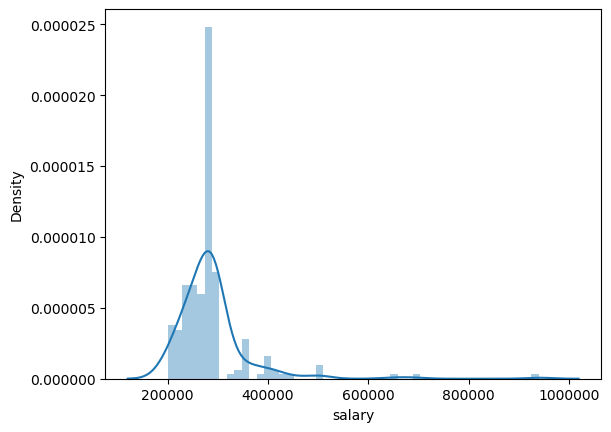

In [7]:
Ndist=sns.distplot(data['salary'])

In [8]:
mean=data.mean()

In [9]:
std_D=data.std()

In [10]:
from scipy.stats import norm
from matplotlib import pyplot

In [11]:
Distribution=norm(mean,std_D)

In [12]:
Distribution

# plot probability density function

In [19]:
values=[]
for value in range(40,50):
    values.append(value)
pdfDist=[Distribution.pdf(value) for value in values]
prob=sum(pdfDist)
print('The area between range {},{} :{}'.format(40,50,prob))

The area between range 40,50 :[3.80910129e-02 4.48925945e-02 5.42608291e-02 1.07576311e-02
 3.72845892e-02 1.40997920e-02 4.97868719e-08]


C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


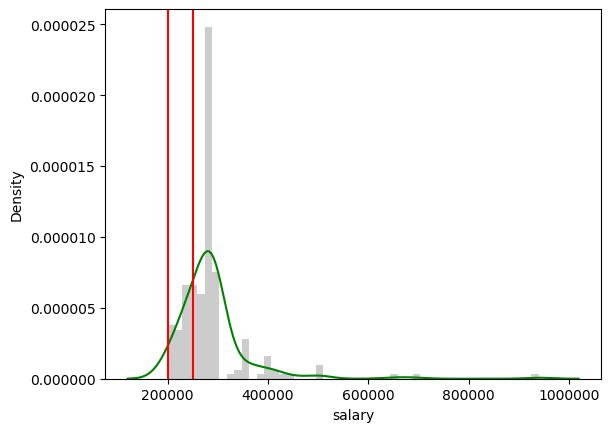

In [28]:
ax=sns.distplot(data['salary'],kde=True,kde_kws={'color':'green'},color='grey')
pyplot.axvline(200000,color='red')
pyplot.axvline(250000,color='red')


In [44]:
def probability_density(data,startrange,endrange):

#using seaborn distribution plot by giving input data and mentioning the kernal distribution as True, color as green, grey 
#for data representation
    ax=sns.distplot(data,kde=True,kde_kws={'color':'green'},color='grey')
    
#with the distplot plot two vertical line mentioning the color as red, has start and end range
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')

#finding mean and std deviation to plot the normal distribution curve
    mean=data.mean()
    std_D=data.std()
    print('mean=%.3f, standard deviation =%.3f' % (mean, std_D))
    
    Ndist=norm(mean,std_D)
    
    
#using inlinear feature for giving range of values and to store it in a list
    values=[value for value in range(startrange,endrange)]
    
#using pdf function plot probability distribution with the values stored in the list
    Pdist=[Ndist.pdf(value) for value in values]
    
#adding all the probability distribution values to find the probability
    probability=sum(Pdist)

    print('The probability in the range ({}- {})={}'.format(startrange,endrange,probability))
    
    return probability


C:\Users\venka\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


mean=66.370, standard deviation =7.359
The probability in the range (65- 75)=0.4659413563062123


0.4659413563062123

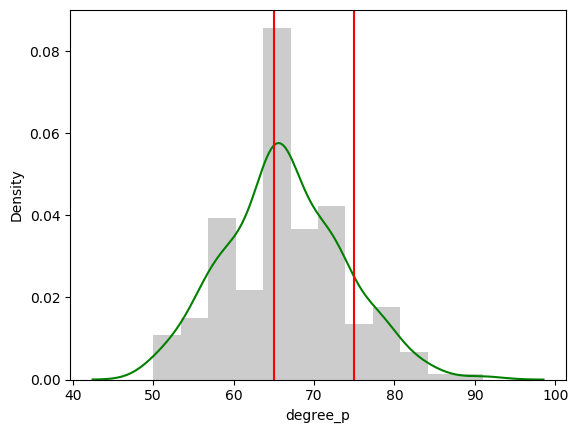

In [45]:
probability_density(data['degree_p'],65,75)

In [47]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 2.4 MB/s eta 0:00:00


In [49]:
from statsmodels.distributions.empirical_distribution import ECDF

In [51]:
cdf=ECDF(data['degree_p'])

In [53]:
cdf(69)

0.6837209302325581